1. Đọc dữ liệu từ hai file facebook_sentiment.csv và twitter_sentiment.csv:

In [2]:
import numpy as np
fb = np.genfromtxt("facebook_sentiment.csv", delimiter=",", dtype=str, skip_header=1)
tw = np.genfromtxt("twitter_sentiment.csv", delimiter=",", dtype=str, skip_header=1)
print(fb)
print(tw)

[['2025-01-01 08:00' '-0.251']
 ['2025-01-01 08:02' '0.901']
 ['2025-01-01 08:04' '0.464']
 ...
 ['2025-01-02 17:14' '-0.726']
 ['2025-01-02 17:16' '0.9']
 ['2025-01-02 17:18' '-0.108']]
[['2025-01-01 08:00' '-0.63']
 ['2025-01-01 08:03' '0.084']
 ['2025-01-01 08:06' '0.746']
 ...
 ['2025-01-03 04:51' '-0.624']
 ['2025-01-03 04:54' '-0.289']
 ['2025-01-03 04:57' '0.568']]


2. Tách time và sentiment thành các mảng riêng:

In [3]:
fb_time_str, fb_sent_str = np.hsplit(fb, 2)
tw_time_str, tw_sent_str = np.hsplit(tw, 2)
fb_sent = fb_sent_str[:, 0].astype(float)
tw_sent = tw_sent_str[:, 0].astype(float)


print("Kết quả sau khi tách từ mảng ban đầu: \n") 
print(" Facebook time: \n")
print( fb_time_str[:5])  
print(" Facebook sentiment: \n")
print( fb_sent_str[:5])  
print(" Twitter time: \n")
print( tw_time_str[:5])  
print(" Twitter sentiment: \n")
print( tw_sent_str[:5])


Kết quả sau khi tách từ mảng ban đầu: 

 Facebook time: 

[['2025-01-01 08:00']
 ['2025-01-01 08:02']
 ['2025-01-01 08:04']
 ['2025-01-01 08:06']
 ['2025-01-01 08:08']]
 Facebook sentiment: 

[['-0.251']
 ['0.901']
 ['0.464']
 ['0.197']
 ['-0.688']]
 Twitter time: 

[['2025-01-01 08:00']
 ['2025-01-01 08:03']
 ['2025-01-01 08:06']
 ['2025-01-01 08:09']
 ['2025-01-01 08:12']]
 Twitter sentiment: 

[['-0.63']
 ['0.084']
 ['0.746']
 ['0.464']
 ['0.613']]


3. Chuyển time sang datetime64:

In [4]:
fb_time = fb_time_str.astype('datetime64')
tw_time = tw_time_str.astype('datetime64')
print(" Facebook time: \n")
print(fb_time[:5])
print(" Twitter time: \n")
print(tw_time[:5])

 Facebook time: 

[['2025-01-01T08:00']
 ['2025-01-01T08:02']
 ['2025-01-01T08:04']
 ['2025-01-01T08:06']
 ['2025-01-01T08:08']]
 Twitter time: 

[['2025-01-01T08:00']
 ['2025-01-01T08:03']
 ['2025-01-01T08:06']
 ['2025-01-01T08:09']
 ['2025-01-01T08:12']]


4. Kiểm tra dtype, shape; in 5 giá trị đầu/cuối:

In [5]:
#fb
#in kích thước và kiểu dữ liệu của mảng(Facebook)

print("Kích thước của mảng là(Facebook):\n", fb.shape)
print("Kiểu dữ liệu phần tử trong mảng là(Facebook):\n", fb.dtype)
#in 5 phần tử đầu tiên trong mảng 
print("5 phần tử đầu tiên trong mảng là(Facebook):\n", fb[:5])

#in 5 phần tử cuối trong mảng 
print("5 phần từ cuối trong mảng là(Facebook):\n",fb[-5:])


#Twitter
#in kích thước và kiểu dữ liệu của mảng(Twitter)
print("kích thước của mảng là(Twitter):\n", tw.shape)
print("kiểu dữ liệu phần tử trong mảng là(Twitter):\n", tw.dtype)

#in 5 phần tử đầu tiên trong mảng 
print("5 phần tử đầu tiên trong mảng là(Twitter):\n", tw[:5])

#in 5 phần tử cuối trong mảng 
print("5 phần từ cuối trong mảng là(Twitter):\n",tw[-5:])


Kích thước của mảng là(Facebook):
 (1000, 2)
Kiểu dữ liệu phần tử trong mảng là(Facebook):
 <U16
5 phần tử đầu tiên trong mảng là(Facebook):
 [['2025-01-01 08:00' '-0.251']
 ['2025-01-01 08:02' '0.901']
 ['2025-01-01 08:04' '0.464']
 ['2025-01-01 08:06' '0.197']
 ['2025-01-01 08:08' '-0.688']]
5 phần từ cuối trong mảng là(Facebook):
 [['2025-01-02 17:10' '-0.817']
 ['2025-01-02 17:12' '0.835']
 ['2025-01-02 17:14' '-0.726']
 ['2025-01-02 17:16' '0.9']
 ['2025-01-02 17:18' '-0.108']]
kích thước của mảng là(Twitter):
 (900, 2)
kiểu dữ liệu phần tử trong mảng là(Twitter):
 <U16
5 phần tử đầu tiên trong mảng là(Twitter):
 [['2025-01-01 08:00' '-0.63']
 ['2025-01-01 08:03' '0.084']
 ['2025-01-01 08:06' '0.746']
 ['2025-01-01 08:09' '0.464']
 ['2025-01-01 08:12' '0.613']]
5 phần từ cuối trong mảng là(Twitter):
 [['2025-01-03 04:45' '0.466']
 ['2025-01-03 04:48' '0.232']
 ['2025-01-03 04:51' '-0.624']
 ['2025-01-03 04:54' '-0.289']
 ['2025-01-03 04:57' '0.568']]


5. Slicing 20% đầu – 20% giữa – 20% cuối:

In [6]:
#Facebook
#20 % đầu
n=fb.shape[0]
k=int(0.2*n)  #20%
dau_fb_20=fb[:k]
print("Facebook 20% đầu:\n",dau_fb_20[:3])

#20% giữa
k1=int(0.4*n)
k2=int(0.6*n)
giua_fb_20=fb[k1:k2]
print("Facebook 20% giữa:\n", giua_fb_20[:3])

#20% cuối
k3=int(0.8*n)
cuoi_fb_20=fb[k3:]
print("Facebook 20% cuối:\n",cuoi_fb_20[:3])

#Twitter
#20% đầu
a=tw.shape[0]
b=int(0.2*a)
dau_t_20=tw[:b]
print("Twitter 20% đầu:\n",dau_t_20[:3])

#20% giữa
b1=int(0.4*a)
b2=int(0.6*a)
giua_t_20=fb[b1:b2]
print("Twitter 20% giữa:\n",giua_t_20[:3])

#20% cuối
b3=int(0.8*a)
cuoi_t_20=fb[b3:]
print("Twitter 20% cuối:\n",cuoi_t_20[:3])


Facebook 20% đầu:
 [['2025-01-01 08:00' '-0.251']
 ['2025-01-01 08:02' '0.901']
 ['2025-01-01 08:04' '0.464']]
Facebook 20% giữa:
 [['2025-01-01 21:20' '-0.794']
 ['2025-01-01 21:22' '0.805']
 ['2025-01-01 21:24' '0.011']]
Facebook 20% cuối:
 [['2025-01-02 10:40' '0.414']
 ['2025-01-02 10:42' '-0.695']
 ['2025-01-02 10:44' '0.153']]
Twitter 20% đầu:
 [['2025-01-01 08:00' '-0.63']
 ['2025-01-01 08:03' '0.084']
 ['2025-01-01 08:06' '0.746']]
Twitter 20% giữa:
 [['2025-01-01 20:00' '-0.224']
 ['2025-01-01 20:02' '0.287']
 ['2025-01-01 20:04' '-0.083']]
Twitter 20% cuối:
 [['2025-01-02 08:00' '0.877']
 ['2025-01-02 08:02' '-0.638']
 ['2025-01-02 08:04' '-0.867']]


6. Boolean mask: sentiment > 0.5, sentiment < -0.5, sentiment trung tính:

In [7]:
#Facebook
fb_lon_hon = fb_sent > 0.5
print("Fb sentiment lớn hơn 0.5:\n", fb_lon_hon[:5])
print("Số lượng facebook sentiment > 0.5: ",fb_lon_hon.sum())

fb_be_hon = fb_sent < 0.5
print("Fb sentiment bé hơn -0.5:\n",fb_be_hon[:5])
print("Số lượng facebook sentiment < 0.5: ",fb_be_hon.sum())

fb_trung_tinh = (fb_sent <= 0.5) & (fb_sent >= 0.5)
print("Fb sentiment trung tính:\n",fb_trung_tinh[:5])
print("Số lượng facebook sentiment trung tính: ",fb_trung_tinh.sum())


#Twitter
tw_lon_hon = tw_sent > 0.5
print("Tw sentiment lớn hơn 0.5:\n", tw_lon_hon[:5])
print("Số lượng twitter sentiment > 0.5: ",tw_lon_hon.sum())

tw_be_hon = tw_sent < 0.5
print("Tw sentiment bé hơn -0.5:\n",tw_be_hon[:5])
print("Số lượng twitter sentiment < 0.5: ",tw_be_hon.sum())

tw_trung_tinh = (tw_sent <= 0.5) & (tw_sent >= 0.5)
print("Tw sentiment trung tính:\n",tw_trung_tinh[:5])
print("Số lượng twitter sentiment trung tính: ",tw_trung_tinh.sum())




Fb sentiment lớn hơn 0.5:
 [False  True False False False]
Số lượng facebook sentiment > 0.5:  243
Fb sentiment bé hơn -0.5:
 [ True False  True  True  True]
Số lượng facebook sentiment < 0.5:  756
Fb sentiment trung tính:
 [False False False False False]
Số lượng facebook sentiment trung tính:  1
Tw sentiment lớn hơn 0.5:
 [False False  True False  True]
Số lượng twitter sentiment > 0.5:  236
Tw sentiment bé hơn -0.5:
 [ True  True False  True False]
Số lượng twitter sentiment < 0.5:  664
Tw sentiment trung tính:
 [False False False False False]
Số lượng twitter sentiment trung tính:  0


7. Broadcasting chênh lệch sentiment giữa Facebook và Twitter:

In [8]:

# --- BẮT ĐẦU BROADCASTING ---
if len(fb_sent) == len(tw_sent):
    # Nếu 2 mảng cùng chiều N → N thì chỉ cần trừ trực tiếp:
    delta_sent = fb_sent - tw_sent     # shape (N,)
    print("delta_sent dtype:", delta_sent.dtype)
    print("delta_sent 5 giá trị đầu:", delta_sent[:5])
else:
    #Nếu 2 mảng KHÔNG cùng kích thước
    N = min(len(fb_sent), len(tw_sent))
    delta_sent = fb_sent[:N] - tw_sent[:N]
print("delta_sent 5 giá trị đầu:", delta_sent[:5])

#Một số phân tích thêm từ delta_sent
strong_gap = np.abs(delta_sent) > 0.5
print("Số thời điểm sentiment lệch mạnh:", strong_gap.sum())


delta_sent 5 giá trị đầu: [ 0.379  0.817 -0.282 -0.267 -1.301]
Số thời điểm sentiment lệch mạnh: 517


8. Fancy indexing lấy top-20 bình luận tích cực và tiêu cực nhất mỗi nền tảng:

In [9]:
# Sao chép mảng để không làm thay đổi gốc
fb_sorted = np.copy(fb_sent)
tw_sorted = np.copy(tw_sent)

# FACEBOOK top 20 tích cực
top20_pos_fb = np.empty(20)
temp = np.copy(fb_sent)
for i in range(20):
    top20_pos_fb[i] = np.max(temp)
    temp = temp[temp != top20_pos_fb[i]]

print("Top 20 tích cực FB:", top20_pos_fb)

# TWITTER top 20 tích cực
top20_pos_tw = np.empty(20)
temp = np.copy(tw_sent)
for i in range(20):
    top20_pos_tw[i] = np.max(temp)
    temp = temp[temp != top20_pos_tw[i]]

print("Top 20 tích cực TW:", top20_pos_tw)

# FACEBOOK top 20 tiêu cực
top20_neg_fb = np.empty(20)
temp = np.copy(fb_sent)
for i in range(20):
    top20_neg_fb[i] = np.min(temp)
    temp = temp[temp != top20_neg_fb[i]]

print("Top 20 tiêu cực FB:", top20_neg_fb)

# TWITTER top 20 tiêu cực
top20_neg_tw = np.empty(20)
temp = np.copy(tw_sent)
for i in range(20):
    top20_neg_tw[i] = np.min(temp)
    temp = temp[temp != top20_neg_tw[i]]

print("Top 20 tiêu cực TW:", top20_neg_tw)


Top 20 tích cực FB: [0.999 0.994 0.993 0.986 0.981 0.98  0.975 0.974 0.973 0.972 0.971 0.97
 0.969 0.965 0.96  0.952 0.949 0.946 0.944 0.94 ]
Top 20 tích cực TW: [0.999 0.996 0.994 0.993 0.99  0.988 0.985 0.984 0.983 0.982 0.976 0.975
 0.973 0.969 0.968 0.967 0.962 0.96  0.954 0.952]
Top 20 tiêu cực FB: [-0.991 -0.99  -0.989 -0.986 -0.982 -0.978 -0.977 -0.976 -0.974 -0.971
 -0.969 -0.967 -0.964 -0.963 -0.961 -0.96  -0.959 -0.955 -0.953 -0.951]
Top 20 tiêu cực TW: [-0.99  -0.988 -0.987 -0.985 -0.981 -0.98  -0.978 -0.977 -0.976 -0.964
 -0.962 -0.958 -0.957 -0.956 -0.953 -0.951 -0.949 -0.948 -0.942 -0.94 ]


9. np.diff phân tích biến động |Δsent| > 0.6.:

In [10]:
# Tính sự thay đổi giữa các giá trị sentiment liên tiếp
chenh_lech_fb = np.diff(fb_sent)
chenh_lech_tw = np.diff(tw_sent)

# Tạo mask cho các biến động mạnh (> 0.6)
mask_biendong_manh_fb = np.abs(chenh_lech_fb) > 0.6
mask_biendong_manh_tw = np.abs(chenh_lech_tw) > 0.6

# In ra 5 biến động mạnh đầu tiên
print("Biến động mạnh FB:", chenh_lech_fb[mask_biendong_manh_fb][:5])
print("Biến động mạnh TW:", chenh_lech_tw[mask_biendong_manh_tw][:5])


Biến động mạnh FB: [ 1.152 -0.885  1.616 -1.375  1.899]
Biến động mạnh TW: [ 0.714  0.662 -1.199  1.533 -1.809]


10. Thống kê tổng hợp: mean, std, median, min, max:

In [11]:
fb_stats = np.array([np.mean(fb_sent), np.std(fb_sent), np.median(fb_sent),
                     np.min(fb_sent), np.max(fb_sent)])
tw_stats = np.array([np.mean(tw_sent), np.std(tw_sent), np.median(tw_sent),
                     np.min(tw_sent), np.max(tw_sent)])

print("Facebook stats (mean,std,median,min,max):", fb_stats)
print("Twitter stats (mean,std,median,min,max):", tw_stats)


Facebook stats (mean,std,median,min,max): [-0.019495    0.58397459 -0.0065     -0.991       0.999     ]
Twitter stats (mean,std,median,min,max): [ 0.01871444  0.58693531  0.046      -0.99        0.999     ]


11. So sánh sentiment 2 nền tảng:

In [12]:
# Tính tổng số lượng sentiment
fb_pos = fb_lon_hon.sum()
fb_neg = fb_be_hon.sum()
fb_neu = fb_trung_tinh.sum()

tw_pos = tw_lon_hon.sum()
tw_neg = tw_be_hon.sum()
tw_neu = tw_trung_tinh.sum()

compare_count = np.array([
    ["FB_Pos", fb_pos, "FB>TW" if fb_pos > tw_pos else "TW>FB" if tw_pos > fb_pos else "Bằng"],
    ["FB_Neg", fb_neg, "FB>TW" if fb_neg > tw_neg else "TW>FB" if tw_neg > fb_neg else "Bằng"],
    ["FB_Neu", fb_neu, "FB>TW" if fb_neu > tw_neu else "TW>FB" if tw_neu > fb_neu else "Bằng"],
    ["TW_Pos", tw_pos, "FB>TW" if fb_pos > tw_pos else "TW>FB" if tw_pos > fb_pos else "Bằng"],
    ["TW_Neg", tw_neg, "FB>TW" if fb_neg > tw_neg else "TW>FB" if tw_neg > fb_neg else "Bằng"],
    ["TW_Neu", tw_neu, "FB>TW" if fb_neu > tw_neu else "TW>FB" if tw_neu > fb_neu else "Bằng"]
])

print("So sánh số lượng sentiment pos/neg/neu:")
print(compare_count)


So sánh số lượng sentiment pos/neg/neu:
[['FB_Pos' '243' 'FB>TW']
 ['FB_Neg' '756' 'FB>TW']
 ['FB_Neu' '1' 'FB>TW']
 ['TW_Pos' '236' 'FB>TW']
 ['TW_Neg' '664' 'FB>TW']
 ['TW_Neu' '0' 'FB>TW']]


12. Xuất file kết quả ket_qua_case_7.csv:

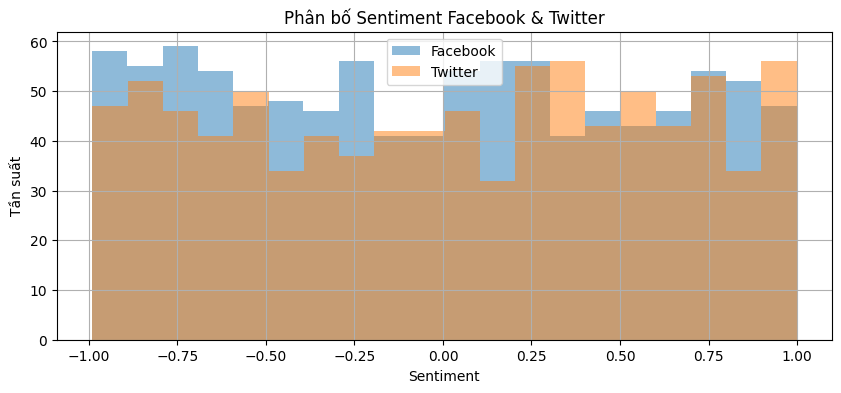

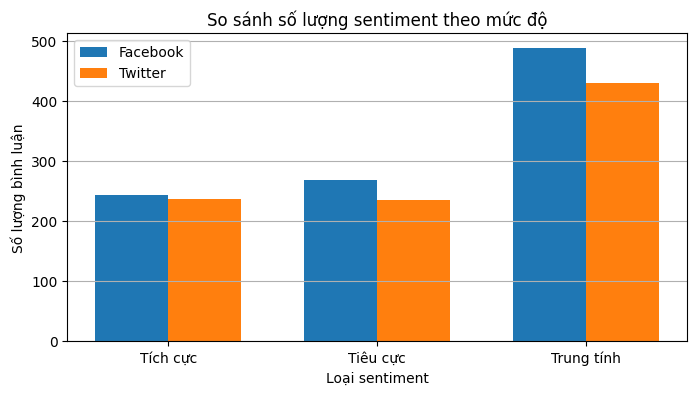

Đã xuất file ket_qua_case_7.csv và lưu 2 biểu đồ histogram + bar chart


In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Giả sử fb_sent, tw_sent đã có
fb_pos = fb_sent > 0.5
fb_neg = fb_sent < -0.5
fb_neu = (fb_sent >= -0.5) & (fb_sent <= 0.5)

tw_pos = tw_sent > 0.5
tw_neg = tw_sent < -0.5
tw_neu = (tw_sent >= -0.5) & (tw_sent <= 0.5)

# --- Bảng tổng hợp sentiment ---
summary = np.array([
    ["Facebook_Tích cực", fb_pos.sum()],
    ["Facebook_Tiêu cực", fb_neg.sum()],
    ["Facebook_Trung tính", fb_neu.sum()],
    ["Twitter_Tích cực", tw_pos.sum()],
    ["Twitter_Tiêu cực", tw_neg.sum()],
    ["Twitter_Trung tính", tw_neu.sum()]
], dtype=object)

# --- So sánh sự tích cực giữa FB và TW ---
if fb_pos.sum() > tw_pos.sum():
    compare_positive = "Facebook có nhiều bình luận tích cực hơn Twitter"
elif fb_pos.sum() < tw_pos.sum():
    compare_positive = "Twitter có nhiều bình luận tích cực hơn Facebook"
else:
    compare_positive = "Facebook và Twitter có số lượng bình luận tích cực bằng nhau"

compare_array = np.array([["So sánh tích cực FB/TW", compare_positive]], dtype=object)
output_array = np.vstack([summary, np.array([["",""]]), compare_array])

# --- Xuất CSV ---
np.savetxt(
    "ket_qua_case_7.csv",
    output_array,
    fmt="%s",
    delimiter=",",
    header="Loại,Số lượng",
    comments="",
    encoding="utf-8"
)

# --- Vẽ Histogram ---
plt.figure(figsize=(10,4))
plt.hist(fb_sent, bins=20, alpha=0.5, label='Facebook')
plt.hist(tw_sent, bins=20, alpha=0.5, label='Twitter')
plt.title("Phân bố Sentiment Facebook & Twitter")
plt.xlabel("Sentiment")
plt.ylabel("Tần suất")
plt.legend()
plt.grid(True)
plt.savefig("histogram_sentiment.png", dpi=150)  # Lưu ảnh
plt.show()

# --- Vẽ Bar Chart ---
labels = ['Tích cực', 'Tiêu cực', 'Trung tính']
fb_counts = [fb_pos.sum(), fb_neg.sum(), fb_neu.sum()]
tw_counts = [tw_pos.sum(), tw_neg.sum(), tw_neu.sum()]
x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(8,4))
plt.bar(x - width/2, fb_counts, width, label='Facebook')
plt.bar(x + width/2, tw_counts, width, label='Twitter')
plt.title("So sánh số lượng sentiment theo mức độ")
plt.xlabel("Loại sentiment")
plt.ylabel("Số lượng bình luận")
plt.xticks(x, labels)
plt.legend()
plt.grid(axis='y')
plt.savefig("bar_sentiment.png", dpi=150)  # Lưu ảnh
plt.show()

print("Đã xuất file ket_qua_case_7.csv và lưu 2 biểu đồ histogram + bar chart")
